# VGG16
This notebook will recreate the VGG16 model from [FastAI Lesson 1](http://course.fast.ai/lessons/lesson1.html) ([wiki](http://wiki.fast.ai/index.php/Lesson_1_Notes)) and [FastAI Lesson 2](http://course.fast.ai/lessons/lesson2.html) ([wiki](http://wiki.fast.ai/index.php/Lesson_2_Notes))

The [Oxford Visual Geometry Group](http://www.robots.ox.ac.uk/~vgg/research/very_deep/) created a 16 layer deep ConvNet which placed first in certain aspects of the 2014 Image-Net competition. Their NN was trained on 1000's of images from the image-net database for all sorts of objects. Instead of retraining the NN ourselves, it is possible to download the weights from their trained NN. By using a pretained model, we can create their work and also adapt it to our own classification task.

## Repurposing the Pretrained VGG16 Model

The pretrained VGG16 model was trained using [image-net data](http://image-net.org/explore). This data is made up of thousands of categories of "things" which each have many framed, well-lit, and focused photos. Knowing these characteristics of the training images will help us understand how this model can and can't work for our dogs vs. cats task.

The image-net data is more specific than just dogs and cats, it has been trained on specific breeds of each. **One hot encoding** is used to label images. This is where the label is a vector of 0's of size equal to the number of categories, but has a 1 where the category is true. So for [dogs, cats] a label of [0, 1] would mean it is a cat.

By repurposing the image-net VGG16 to look for just cats and dogs, we are **Finetuning** the mode. This is where we start with a model that already solved a similar problem. Many of the parameters should be the same, so we only select a subset of them to re-train. Finetuning will replace the 1000's of image-net categories with the 2 it found in our directory structure (dogs and cats). It does this by removing the last layer (with the keras .pop method) and then adding a new output layer with size 2. This will leave us with a pretrained VGG16 model specifically made for categorizing just cats and dogs.

Why do Finetuning instead of training our own network?  
Image-net NN has already learned a lot about what the world looks like. The first layer of a NN looks for basic shapes, patterns, or gradients ... which are known as **gabor filters**. These images come from this paper ([Visualizing and Understanding Convolutional Networks](https://arxiv.org/pdf/1311.2901.pdf)):

<img src="images/Layer1.png" alt="Drawing" style="width: 600px;"/>

The second layer combines layer 1 filters to create newer, more complex filters. So it turns multiple line filters into corner filters, and combines lines into curved edges, for example.  

<img src="images/Layer2.png" alt="Drawing" style="width: 600px;"/>

Further into the hidden layers of a NN, filters start to find more complex shapes, repeating geometric patterns, faces, etc.

<img src="images/Layer3.png" alt="Drawing" style="width: 600px;"/>

<img src="images/Layer4-5.png" alt="Drawing" style="width: 600px;"/>

VGG16 has ... 16 ... layers, so there are tons of filters created at each layer. Finetuning keeps these lower level filters which have been created already and then combines them in a different way to address different inputs (i.e. cats and dogs instead of 1000's of categories). Neural networks pretrained on HUGE datasets have already found all of these lower level filters, so we don't need to spend weeks doing that part ourselves. Finetuning usually works best on the second to last layer, but it's also a good idea to try it at every layer.

Additional information on fine-tuning (aka transfer-learning) can be found on Stanford's CS231n website [here](http://cs231n.github.io/transfer-learning/).


## VGG Detailed Sizing
A rough calculation for the memory requirements of running VGG16 can be calculated, as was done in the [Stanford CS231n CNN Course](http://cs231n.#GBs required for 16 image mini-batch
size = ((15184000 + 3*4096000) * 4 * 2 * 16) / (1024**3)
print(str(round(size,2)) + 'GB')

This makes sense when tested with my 6GB GTX980ti. A mini-batch size of 32 ran out of VRAM. The GPU has to run other stuff too and has a normal load of around 0.7GB.github.io/convolutional-networks/). At each layer, we can find the size of the memory required and weights. Notice that most of the memory (and compute time) is used in the first layers, while most of the parameters are in the last FC layers. Notice that the POOL layers reduce the spatial dimensions by 50% (don't effect depth) and do not introduce any new parameters.

| Layer        | Size/Memory          |  Weights                   |
|:---          |:---                  |:---                        |
| INPUT        | 224x224x3   = 150K   | 0                          |
| CONV3-64     | 224x224x64  = 3.2M   | (3x3x3)x64 = 1,728         |
| CONV3-64     | 224x224x64  = 3.2M   | (3x3x3)x64 = 36,864        |
| POOL2        | 112x112x64  = 800K   | 0                          |
| CONV3-128    | 112x112x128 = 1.6M   | (3x3x64)x128 = 73,728      |
| CONV3-128    | 112x112x128 = 1.6M   | (3x3x128)x128 = 147,456    |
| POOL2        | 56x56x128   = 400K   | 0                          |
| CONV3-256    | 56x56x256   = 800K   | (3x3x128)x256 = 294,912    |
| CONV3-256    | 56x56x256   = 800K   | (3x3x256)x256 = 589,824    |
| CONV3-256    | 56x56x256   = 800K   | (3x3x256)x256 = 589,824    |
| POOL2        | 28x28x256   = 200K   | 0                          |
| CONV3-512    | 28x28x512   = 400K   | (3x3x256)x512 = 1,179,648  |
| CONV3-512    | 28x28x512   = 400K   | (3x3x512)x512 = 2,359,296  |
| CONV3-512    | 28x28x512   = 400K   | (3x3x512)x512 = 2,359,296  |
| POOL2        | 14x14x512   = 100K   | 0                          |
| CONV3-512    | 14x14x512   = 100K   | (3x3x512)x512 = 2,359,296  |
| CONV3-512    | 14x14x512   = 100K   | (3x3x512)x512 = 2,359,296  |
| CONV3-512    | 14x14x512   = 100K   | (3x3x512)x512 = 2,359,296  |
| POOL2        | 7x7x512     = 25K    | 0                          |
| FC           | 1x1x4096    = 4K     | 7x7x512x4096 = 102,760,448 |
| FC           | 1x1x4096    = 4K     | 4096x4096 = 16,777,216     |
| FC           | 1x1x1000    = 1K     | 4096x1000 = 4,096,000      |

TOTAL MEMORY = (LayerSizes + 3\*Weights) \* 4 Bytes \* 2 (fwd and bkwd passes) \* images/batch

In [1]:
#GBs required for 16 image mini-batch
size = ((15184000 + 3*4096000) * 4 * 2 * 16) / (1024**3)
print(str(round(size,2)) + 'GB')

3.27GB


This makes sense when tested with my 6GB GTX980ti. A mini-batch size of 32 ran out of VRAM. The GPU has to run other stuff too and has a normal load of around 0.7GB.

## Custom Written VGG16 Model

This section will go step by step through the process of recreating the VGG16 model from scratch, using python and Keras.

### Prepare the Workspace
Here we will set matplotlib plots to load directly in this notebook, load all of the python packages needed, check where our data directory is saved, as well as save the pre-trained VGG16 model from the web url.

In [42]:
%matplotlib inline

In [1]:
import json
from matplotlib import pyplot as plt

import numpy as np
from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers import Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
data_path = "../../fastAI/deeplearning1/nbs/data/dogscats/"
!ls $data_path

models
sample
test1
train
valid


The Keras 'get_file' function will download a file from a URL if it's not already in the cache. The !ls command shows that the file is in the .keras/models/ directory which we specified as our cache location:

In [3]:
FILE_URL = "http://files.fast.ai/models/";
FILE_CLASS = "imagenet_class_index.json";

fpath = get_file(FILE_CLASS, FILE_URL+FILE_CLASS, cache_subdir='models')

In [60]:
!ls ~/.keras/models

imagenet_class_index.json
vgg16.h5


The class file itself is a dictionary where keys are strings from 0 to 1000 and the values are names of everyday objects. Let's open the file using 'json.load' and convert it to a 'classes' array:

In [74]:
with open(fpath) as f:
    class_dict = json.load(f)
    
classes = [class_dict[str(i)][1] for i in range(len(class_dict))]

In [77]:
print(class_dict['809'])
print(class_dict['809'][1])

['n04263257', 'soup_bowl']
soup_bowl


Check how many objects are in the 'classes' array and then print the first 5:

In [78]:
print(len(classes))
print(classes[:5])

1000
['tench', 'goldfish', 'great_white_shark', 'tiger_shark', 'hammerhead']


### Build the Model
We need to define the NN model architecture and then load the pre-trained weights (that we downloaded) into it. The VGG model has 1 type of convolutional block and 1 type of fully-connected block. We'll create functions to define each of these blocks and then call them later to actually instantiate the VGG model:

In [8]:
def ConvBlock(layers, model, filters):
    for i in range(layers):
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(filters, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

In [9]:
def FullyConnectedBlock(model):
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

### Preprocessing
The original VGG model has a mean of zero for each channel, obtained by subtracting the average of each RGB channel. It also expects data in the BGR order, so we need to do some preprocessing: 

In [10]:
vgg_mean = np.array([123.68, 116.779, 103.939]).reshape((3,1,1))

In [11]:
def vgg_preprocess(x):
    x = x - vgg_mean   #subtract mean
    return x[:, ::-1]  #RGB -> BGR

### Instantiate the Model
The convolutional layers help find patterns in the images, while the fully connected (Dense) layers combine patterns across an image. The following function calls the other functions written above. It will instantiate a 16 layer VGG model:

In [12]:
def VGG16():
    model = Sequential()
    model.add(Lambda(vgg_preprocess, input_shape=(3,224,224)))
    
    ConvBlock(2, model, 64)
    ConvBlock(2, model, 128)
    ConvBlock(3, model, 256)
    ConvBlock(3, model, 512)
    ConvBlock(3, model, 512)
    
    model.add(Flatten())
    FullyConnectedBlock(model)
    FullyConnectedBlock(model)
    model.add(Dense(1000, activation='softmax'))
    
    return model

In [13]:
model = VGG16()

### Load Pretrained Weights
Now that a VGG16 model has been created, we can load it up with the pretrained weights we downloaded earlier. This step prevents us from having to train the NN on the 1000's of image-net samples:

In [79]:
fweights = get_file('vgg16.h5', FILE_URL+'vgg16.h5', cache_subdir='models')
model.load_weights(fweights)

### Grab Batches of Images
Now the NN is setup to use, so we can grab batches of images and start using the NN to predict their output classes:

In [15]:
batch_size = 4

The following helper function will use the Keras [image.ImageDataGenerator](https://keras.io/preprocessing/image/) object with its **flow_from_directory()** method to start pulling batches of images from the directory we tell it to. It returns an Iterator which we can call with next to get the next *batch_size* amount of image/label pairs:

In [16]:
def get_batches(dirname, gen=image.ImageDataGenerator(), shuffle=True, batch_size=batch_size, class_mode='categorical'):
        return gen.flow_from_directory(data_path+dirname, target_size=(224,224), class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)

In [31]:
batches = get_batches('sample/train', batch_size=batch_size)
val_batches = get_batches('sample/valid', batch_size=batch_size)

Found 16 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [48]:
def show_plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

Checking the shape of imgs, we can see that this array holds 4 images, each with 3 channels (BGR) and are of size 224x224 pixels

In [90]:
imgs,labels = next(batches)
print(imgs.shape)
print(labels[0])

(4, 3, 224, 224)
[ 0.  1.]


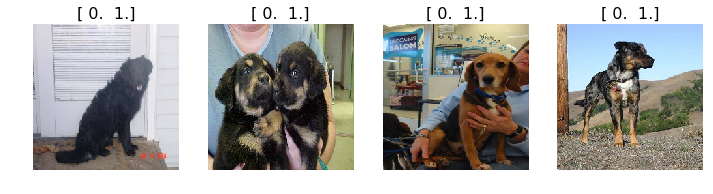

In [91]:
show_plots(imgs, titles=labels)

### Predict
Now we will call the predict method on our Sequential Keras model. This returns a vector of size 1000 with probabilities that each image belongs to one of the 1000 image-net categories. The function below is written to find the highest probability for each image in our batch:

In [87]:
def pred_batch(imgs):
    preds = model.predict(imgs)
    idxs = np.argmax(preds, axis=1)

    print('Shape: {}'.format(preds.shape))
    print('Predictions prob/class: ')
    
    for i in range(len(idxs)):
        idx = idxs[i]
        print ('  {:.4f}/{}'.format(preds[i, idx], classes[idx]))

In [92]:
pred_batch(imgs)

Shape: (4, 1000)
Predictions prob/class: 
  0.4155/Scotch_terrier
  0.2458/toy_terrier
  0.3322/Chihuahua
  0.1351/English_springer


In [89]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

## Retrain the Last Layer
Let's replace the final layer with a softmax

In [93]:
model.pop()
for layer in model.layers: layer.trainable=False

In [94]:
model.add(Dense(2, activation='softmax'))